# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the **race**, **age** and **gender** of the deceased, **whether the person was armed**, and whether the victim was experiencing a **mental-health** crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.


>[Introduction](#scrollTo=0KrR-Qd_wXf-)

>>[Import Libraries](#scrollTo=jqXsMLNJxELp)

>>[Load the Data](#scrollTo=nKxJMOiMyAUF)

>[Preliminary Data Exploration](#scrollTo=6RuA5SvUyEaB)

>>[Check for Missing and Duplicate values](#scrollTo=pGz4N9O4HsUA)

>>[Data Cleaning](#scrollTo=p72TfMvayr2C)

>>[Outliners](#scrollTo=_EF_N8V-7yia)

>[Explatory Data Analysis](#scrollTo=EsaxdhuaLBus)

>>[EDA with visualization](#scrollTo=kifV9ViMQkO7)

>>>[Shootings by race](#scrollTo=DyiFJ97_XNPk)

>>>[Shootings by year](#scrollTo=mVeJYUbpXYti)

>>>[Shootings by state](#scrollTo=SRFyG2YyZopD)

>>>[Shootings by gender](#scrollTo=AoHcfX0KZx4b)

>>>[Shootings by state for each gender](#scrollTo=PAjXY6Kkadjy)

>>>[Shootings by race for each gender](#scrollTo=ZRByuue6b1bj)

>>>[Were People Armed?](#scrollTo=h1pAgkyb3Xb0)

>>>[Distribution of Weapons in Police Killings](#scrollTo=pTBkiHOle1ba)

>>>[The Age and Manner of Death](#scrollTo=ZxbBdvM0uRpQ)

>>>[Percentage of people killed were under 25 years old.](#scrollTo=BNPrdT-W9lf3)

>>>[The distribution of ages of the people killed by police.](#scrollTo=5XrAD_ey9qBB)

>>>[The percentage have been diagnosed with a mental illness](#scrollTo=SJaNm4rC5nWm)

>>>[In Which Cities Do the Most Police Killings Take Place?](#scrollTo=R0WSPeKD5Cir)

>[Modelling](#scrollTo=rSjsVq59QqxT)

>>[signs_of_mental_illness](#scrollTo=sdfoS8PrRCpo)

>>>[Feature Engineering](#scrollTo=UtASVvzlRqo1)

>>>[Normalization](#scrollTo=tgX-S4KYemrH)

>>>[Training](#scrollTo=6iafP9sncC9i)

>>>[Fine tuning](#scrollTo=kdHayJLugQTc)

>>[Race](#scrollTo=aR4bTidAiuEm)

>>>[Training](#scrollTo=XqPQZ3LJl_5n)



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
pd.options.display.float_format = '{:,.3f}'.format

## Load the Data

In [3]:
df = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.000,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.000,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.000,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.000,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.000,M,H,Evans,CO,False,attack,Not fleeing,False


# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?
* Are there any outliners?

In [5]:
#DataFrames Shape
print(f'Deaths_by_Police_US shape is {df.shape}, samples: {df.shape[0]},features: {df.shape[1]}')

Deaths_by_Police_US shape is (2535, 14), samples: 2535,features: 14


In [6]:
##DataFrames columns(features)
print('\nDeaths_by_Police_US columns:', df.columns)


Deaths_by_Police_US columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
#Type of each column
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

## Check for Missing and Duplicate values

In [8]:
print('NAN: \n',df.isnull().sum())
print('Duplicates:',df.duplicated().any())

NAN: 
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64
Duplicates: False


In [9]:
def compute_percentage_of_missing(df1):
  total = df1.isnull().sum().sort_values(ascending= False)
  percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending= False)
  missing = pd.concat([total,percent], axis =1, keys = ['Total', 'Percent'])
  return missing

In [10]:
compute_percentage_of_missing(df)

,Total,Percent
race,195,0.077
age,77,0.030
flee,65,0.026
armed,9,0.004
id,0,0.000
name,0,0.000
date,0,0.000
manner_of_death,0,0.000
gender,0,0.000
city,0,0.000


## Data Cleaning

Consider how to deal with the NaN values.

In [11]:
def imputation(df):
    missing_percentages = compute_percentage_of_missing(df)['Percent']
    df_imputed = df.copy()
    # Columns with missing percentage greater than 0.005
    columns_to_fill_with_zero = missing_percentages[missing_percentages < 0.005].index
    # Columns with missing percentage less than or equal to 0.005
    columns_to_fill_with_mean = missing_percentages[missing_percentages >= 0.005].index

    # Fill NaN values with 0 for columns with missing percentage less than 0.005
    df_imputed[columns_to_fill_with_zero] = df_imputed[columns_to_fill_with_zero].fillna(0)

    # Fill NaN values with mean for columns with missing percentage greater than or equal to 0.005
    for column in columns_to_fill_with_mean:
        if df_imputed[column].dtype == 'object':
            df_imputed[column] = df_imputed[column].fillna(df_imputed[column].mode().iloc[0])  # Filling with mode for non-numeric columns
        else:
            df_imputed[column] = df_imputed[column].fillna(df_imputed[column].mean())
    return df_imputed

In [12]:
df_imputed = imputation(df)

In [13]:
print('NAN: \n',df_imputed.isnull().sum())

NAN: 
 id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64


##Outliners

In [14]:
#outliners
def check_outlier(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

    df = df[~outliers]
    return df

In [15]:
df_imputed = check_outlier(df_imputed)

<ipython-input-14-7962bfd0dced>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


In [16]:
df_imputed

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.000,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.000,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.000,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.000,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.000,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.000,M,W,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,36.605,M,W,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.000,M,W,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.000,M,B,Oshkosh,WI,False,attack,Car,True


In [17]:
df.to_csv("clean_police_df.csv")

#Explatory Data Analysis

In [18]:
df_imputed.describe()

,id,age
count,"2,513.000","2,513.000"
mean,"1,445.430",36.237
std,793.290,12.259
min,3.000,6.000
25%,771.000,27.000
50%,"1,452.000",35.000
75%,"2,126.000",45.000
max,"2,822.000",72.000


In [19]:
df_imputed.groupby(['gender','race']).age.describe()[['count','mean','min','max']].round(0)

count   mean    min    max
gender race                               
F      A        1.000 37.000 37.000 37.000
       B       26.000 33.000 20.000 66.000
       H        5.000 24.000 16.000 37.000
       N        5.000 31.000 23.000 38.000
       O        2.000 38.000 27.000 50.000
       W       68.000 39.000 12.000 71.000
M      A       38.000 37.000 15.000 61.000
       B      590.000 32.000 13.000 68.000
       H      416.000 33.000 14.000 71.000
       N       26.000 30.000 19.000 49.000
       O       26.000 33.000 18.000 56.000
       W    1,310.000 40.000  6.000 72.000

## EDA with visualization

In [20]:
df_imputed['race'].value_counts()

W    1378
B     616
H     421
A      39
N      31
O      28
Name: race, dtype: int64

### Shootings by race

<ipython-input-21-ef50144de4e9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_by_race.index, y=percentage_by_race.values, palette='viridis')


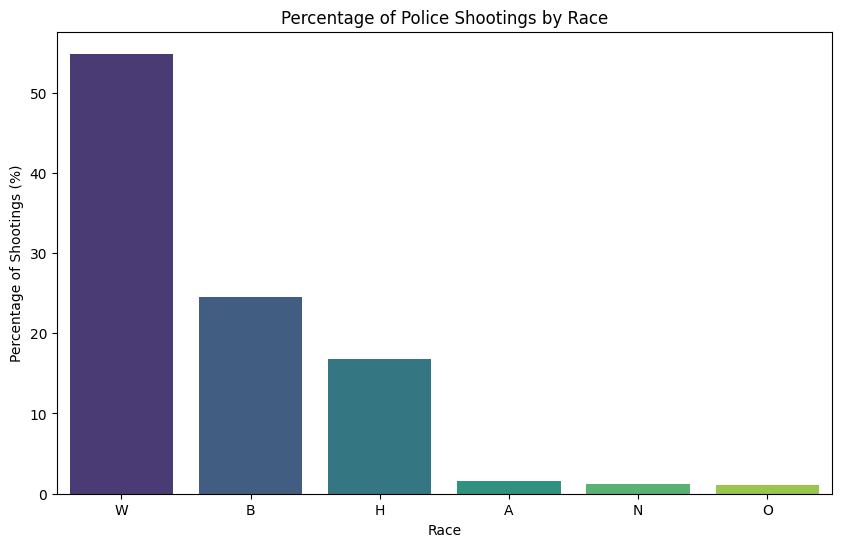

In [21]:
shootings_by_race = df_imputed['race'].value_counts()

#percentage of shootings by race
percentage_by_race = ((shootings_by_race / shootings_by_race.sum()) * 100).sort_values(ascending=False)


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_by_race.index, y=percentage_by_race.values, palette='viridis')
plt.xlabel('Race')
plt.ylabel('Percentage of Shootings (%)')
plt.title('Percentage of Police Shootings by Race')
plt.show()


In [22]:
# change data tyepes
df_imputed['date'] = pd.to_datetime(df_imputed['date'])
df_imputed.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

### Shootings by year

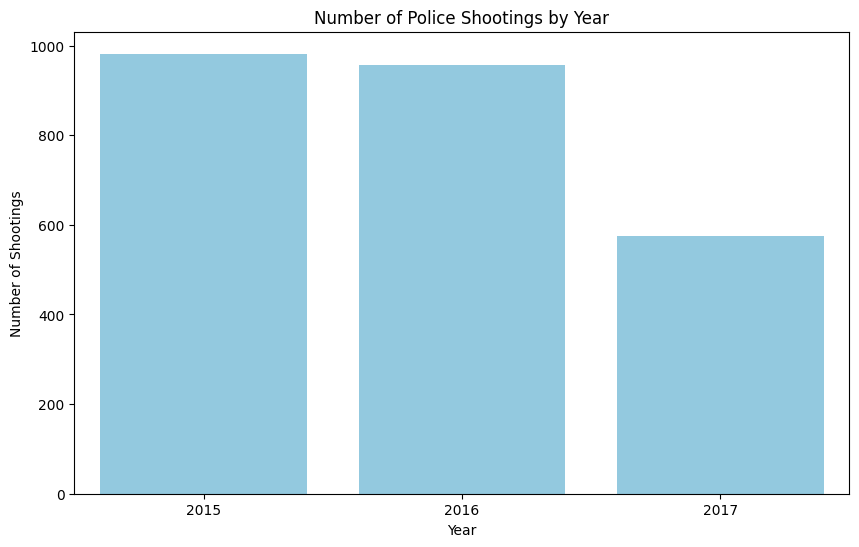

In [23]:
# Extract the year from the 'date' column
df_imputed['year'] = df_imputed['date'].dt.year

# Count the number of shootings per year
shootings_by_year = df_imputed['year'].value_counts().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=shootings_by_year.index, y=shootings_by_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.title('Number of Police Shootings by Year')
plt.show()

###Shootings by state

<ipython-input-24-4e3119f1add3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_by_state.index, y=percentage_by_state.values, palette='viridis')


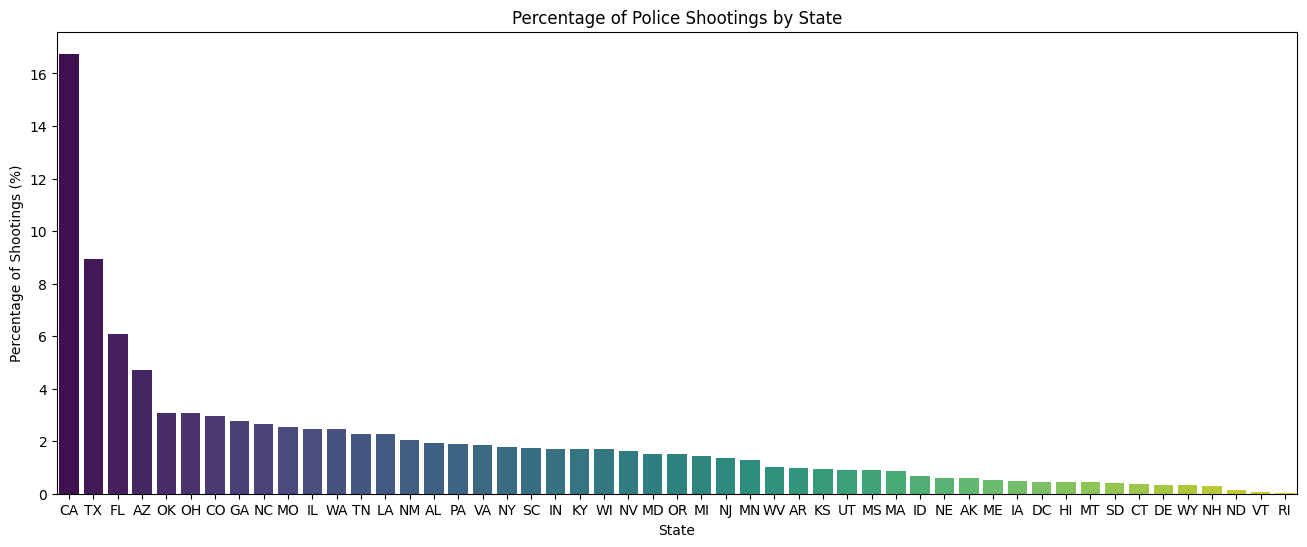

In [24]:
shootings_by_state = df_imputed['state'].value_counts()

#percentage of shootings by race
percentage_by_state = ((shootings_by_state / shootings_by_state.sum()) * 100).sort_values(ascending=False)


# Create a bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=percentage_by_state.index, y=percentage_by_state.values, palette='viridis')
plt.xlabel('State')
plt.ylabel('Percentage of Shootings (%)')
plt.title('Percentage of Police Shootings by State')
plt.show()

###Shootings by gender

How many more men are killed compared to women?

<ipython-input-25-92f6efe35c6d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_by_gender.index, y=percentage_by_gender.values, palette='viridis')


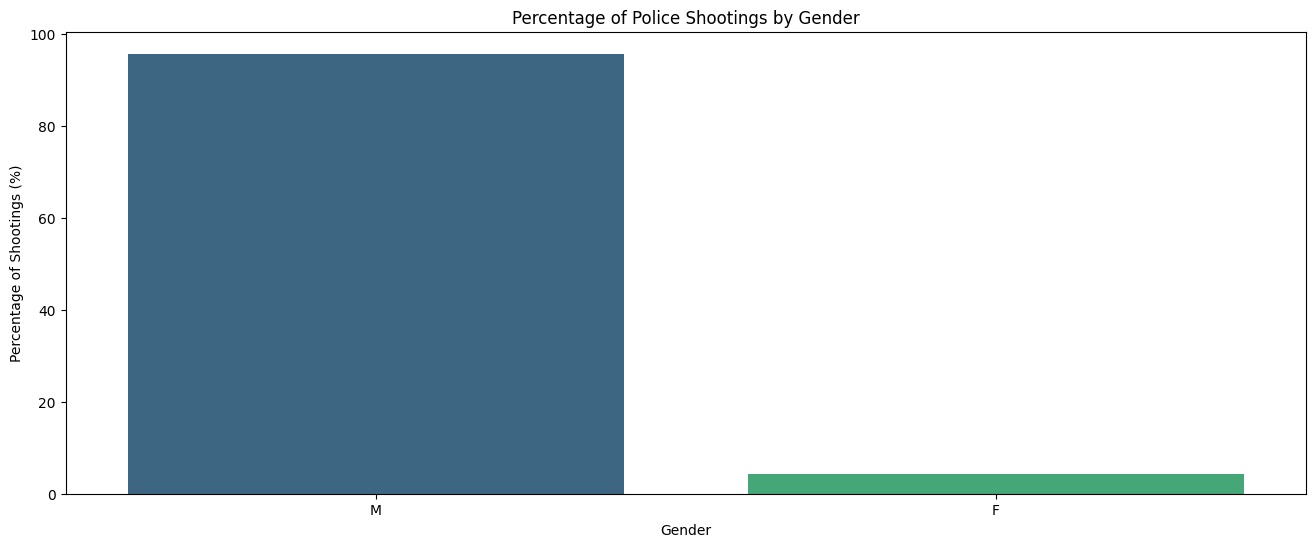

In [25]:
shootings_by_gender = df_imputed['gender'].value_counts()

#percentage of shootings by race
percentage_by_gender = ((shootings_by_gender / shootings_by_gender.sum()) * 100).sort_values(ascending=False)


# Create a bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=percentage_by_gender.index, y=percentage_by_gender.values, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Percentage of Shootings (%)')
plt.title('Percentage of Police Shootings by Gender')
plt.show()

###Shootings by state for each gender

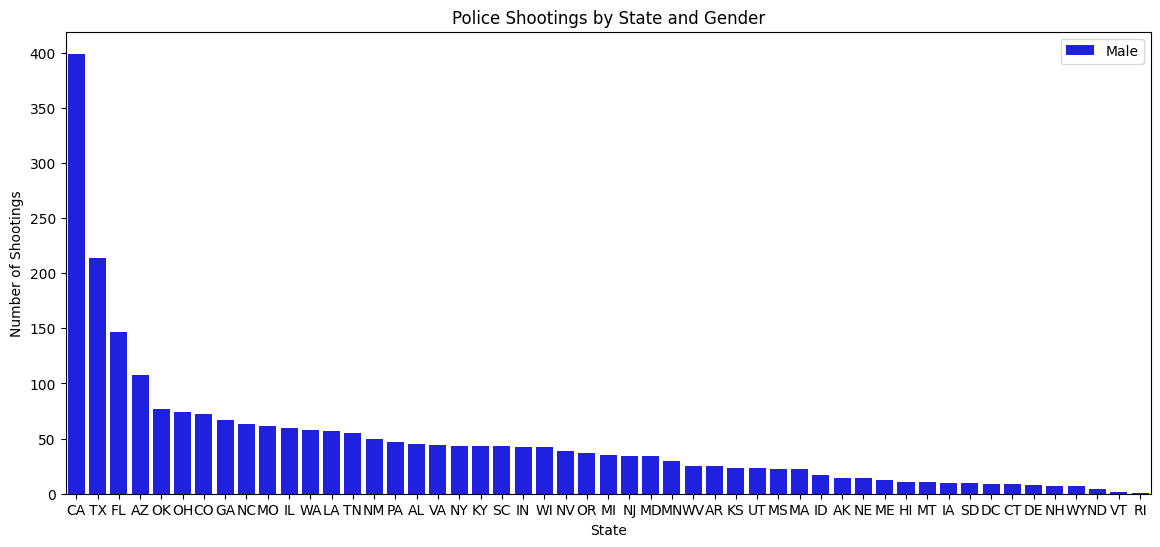

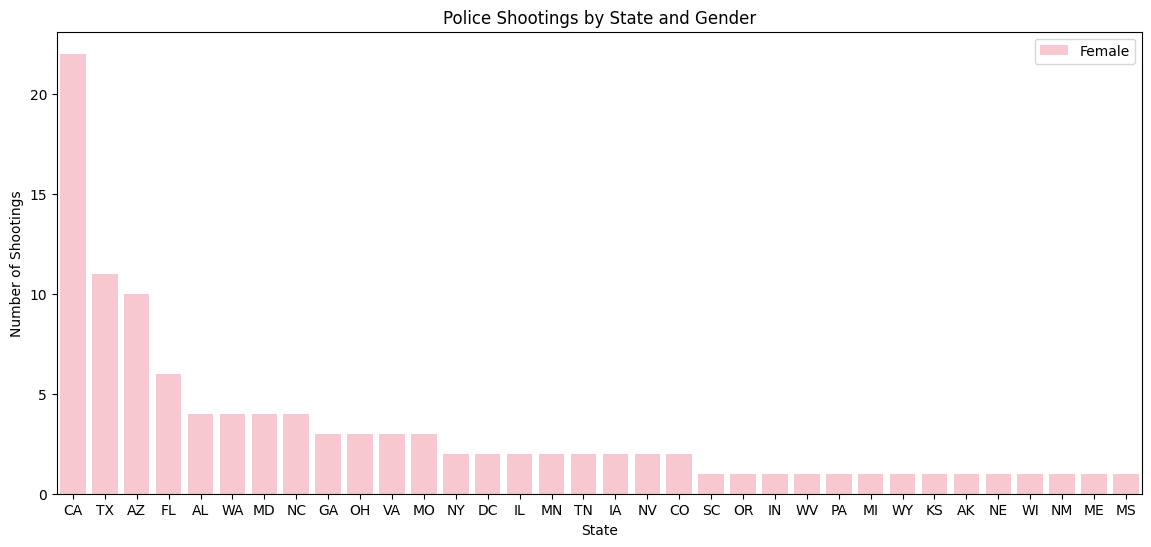

In [26]:
male_shootings = df_imputed[df_imputed['gender'] == 'M']
female_shootings = df_imputed[df_imputed['gender'] == 'F']

# Count the number of shootings by state for each gender
male_shootings_by_state = male_shootings['state'].value_counts()
female_shootings_by_state = female_shootings['state'].value_counts()

# Create a bar plot for male shootings
plt.figure(figsize=(14, 6))
sns.barplot(x=male_shootings_by_state.index, y=male_shootings_by_state.values, color='blue', label='Male')
plt.xlabel('State')
plt.ylabel('Number of Shootings')
plt.title('Police Shootings by State and Gender')
plt.legend()

# Create a bar plot for female shootings
plt.figure(figsize=(14, 6))
sns.barplot(x=female_shootings_by_state.index, y=female_shootings_by_state.values, color='pink', label='Female')
plt.xlabel('State')
plt.ylabel('Number of Shootings')
plt.title('Police Shootings by State and Gender')
plt.legend()

# Show the plots
plt.show()

###Shootings by race for each gender

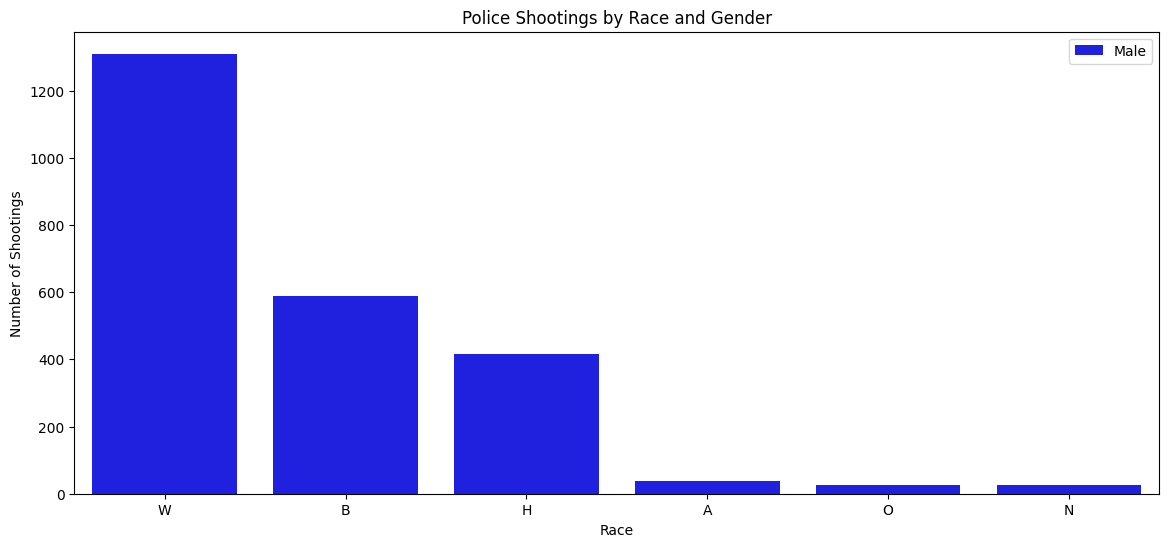

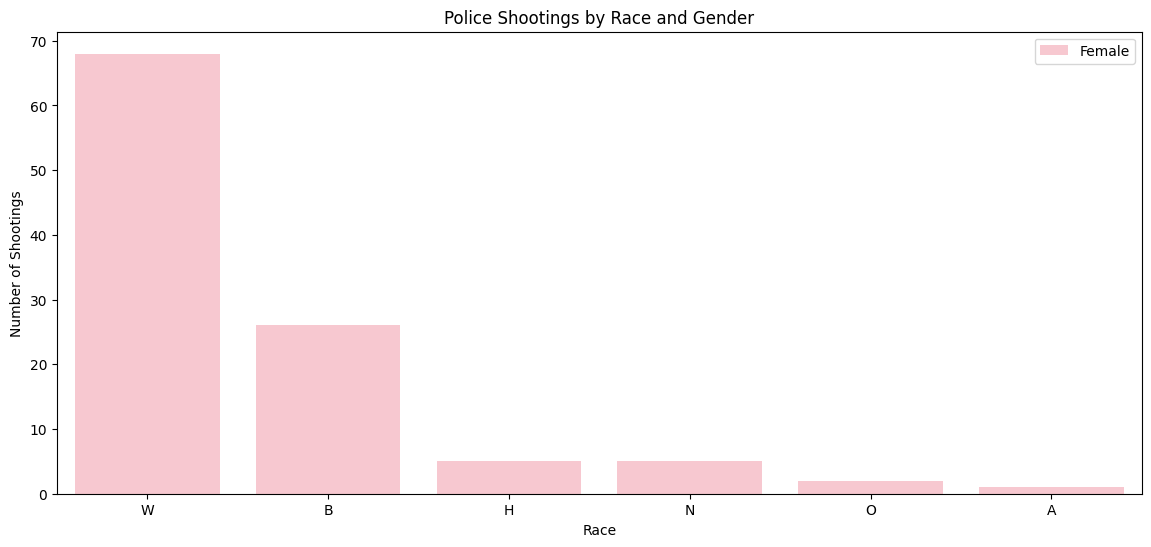

In [27]:
# Count the number of shootings by race for each gender
male_shootings_by_Race = male_shootings['race'].value_counts()
female_shootings_by_Race = female_shootings['race'].value_counts()

# Create a bar plot for male shootings
plt.figure(figsize=(14, 6))
sns.barplot(x=male_shootings_by_Race.index, y=male_shootings_by_Race.values, color='blue', label='Male')
plt.xlabel('Race')
plt.ylabel('Number of Shootings')
plt.title('Police Shootings by Race and Gender')
plt.legend()

# Create a bar plot for female shootings
plt.figure(figsize=(14, 6))
sns.barplot(x=female_shootings_by_Race.index, y=female_shootings_by_Race.values, color='pink', label='Female')
plt.xlabel('Race')
plt.ylabel('Number of Shootings')
plt.title('Police Shootings by Race and Gender')
plt.legend()

# Show the plots
plt.show()

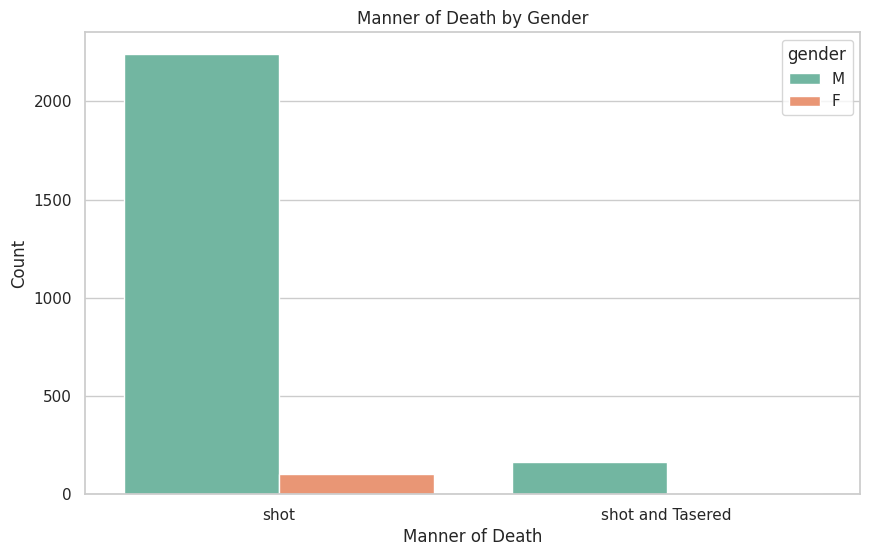

In [28]:
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='manner_of_death', hue='gender', data=df_imputed, palette='Set2')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Manner of Death by Gender')
plt.show()

### Were People Armed?

In what percentage of police killings were people armed?

In [29]:
df_imputed

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-02-01,shot,gun,53.000,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.000,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.000,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.000,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.000,M,H,Evans,CO,False,attack,Not fleeing,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.000,M,W,Kansas City,MO,False,attack,Not fleeing,False,2017
2531,2813,TK TK,2017-07-28,shot,vehicle,36.605,M,W,Albuquerque,NM,False,attack,Car,False,2017
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.000,M,W,Melba,ID,False,attack,Car,False,2017
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.000,M,B,Oshkosh,WI,False,attack,Car,True,2017


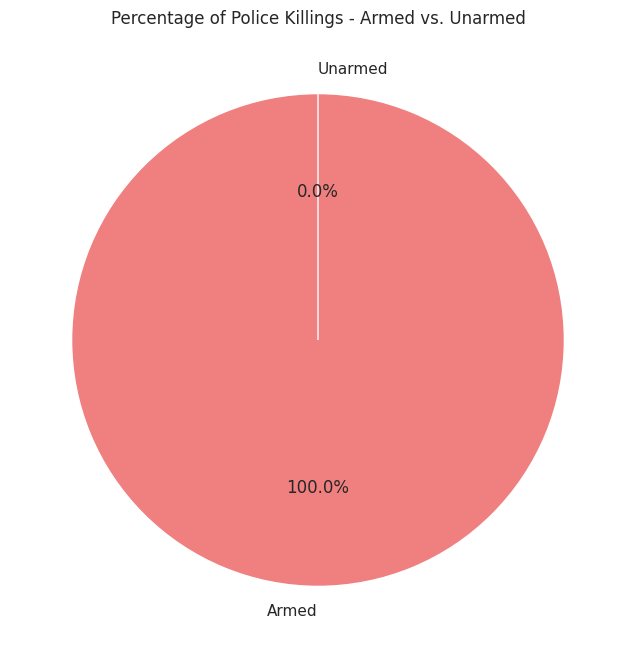

In [30]:
# Count the occurrences of armed and unarmed
armed_counts = df_imputed['armed'].notna().sum()
unarmed_counts = df_imputed['armed'].isna().sum()

# Create a pie chart
labels = ['Armed', 'Unarmed']
sizes = [armed_counts, unarmed_counts]
colors = ['lightcoral', 'lightblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Police Killings - Armed vs. Unarmed')
plt.show()

###Distribution of Weapons in Police Killings

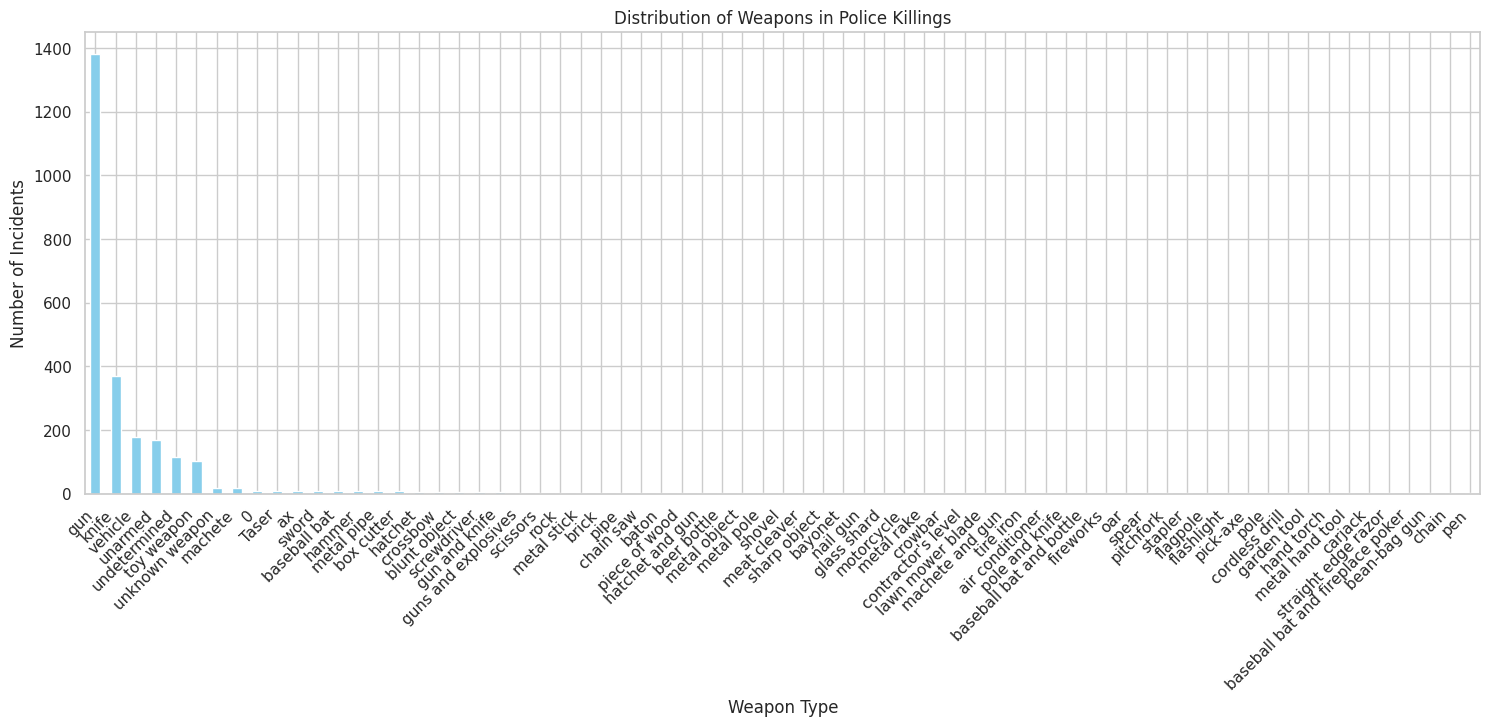

In [31]:
weapon_distribution = df_imputed['armed'].value_counts()

# Create a bar chart
plt.figure(figsize=(18, 6))
weapon_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Weapons in Police Killings')
plt.xticks(rotation=45, ha='right')
plt.show()

###The Age and Manner of Death



<ipython-input-32-629cb690d203>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='manner_of_death', y='age', data=df_imputed, palette='viridis')


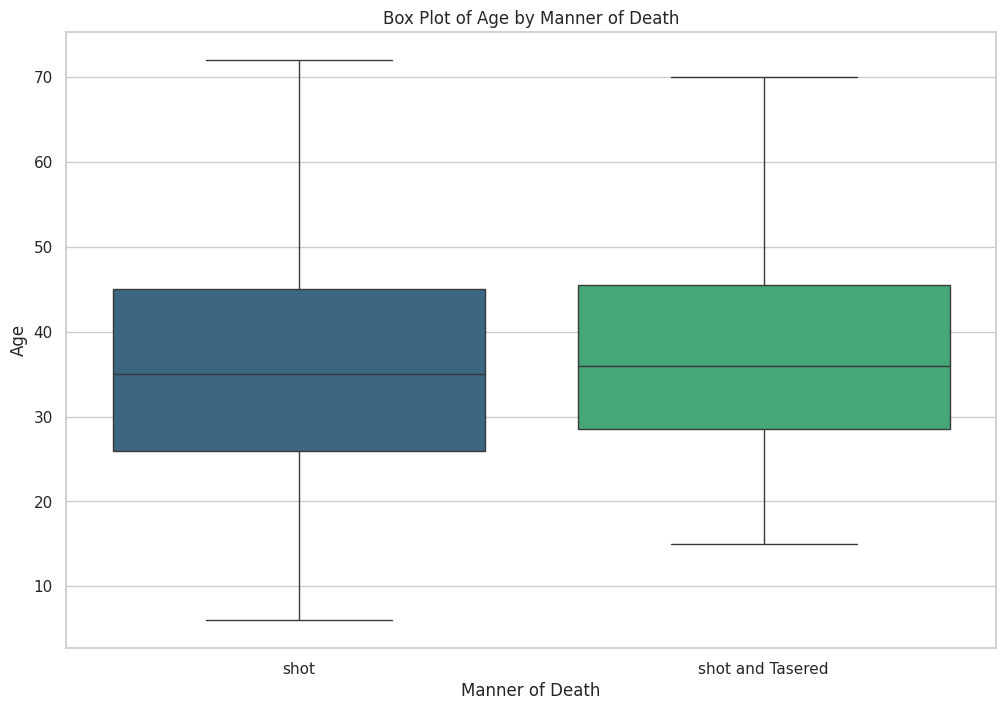

In [32]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='manner_of_death', y='age', data=df_imputed, palette='viridis')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.title('Box Plot of Age by Manner of Death')
plt.show()

### Percentage of people killed were under 25 years old.  

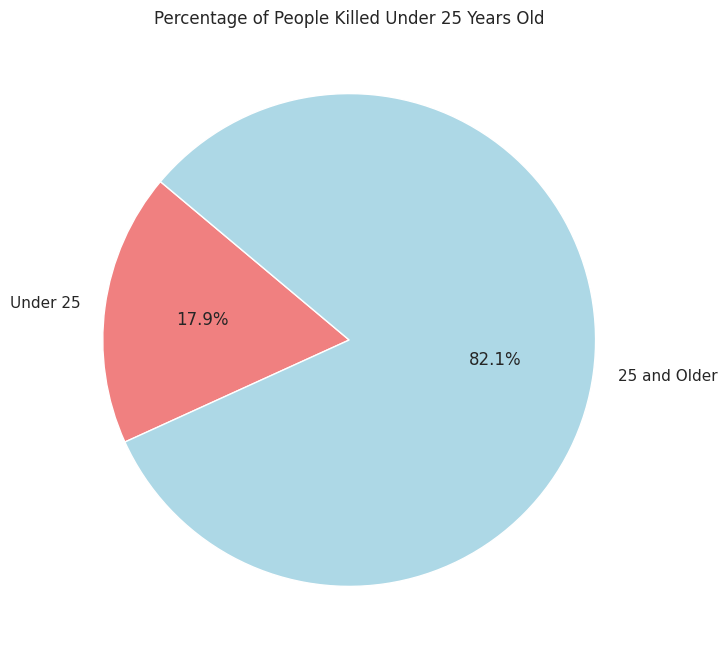

In [33]:
under_25_counts = df_imputed[df_imputed['age'] < 25].shape[0]
total_counts = df_imputed.shape[0]
percentage_under_25 = (under_25_counts / total_counts) * 100

# Create a pie chart
labels = ['Under 25', '25 and Older']
sizes = [percentage_under_25, 100 - percentage_under_25]
colors = ['lightcoral', 'lightblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of People Killed Under 25 Years Old')
plt.show()

### The distribution of ages of the people killed by police.

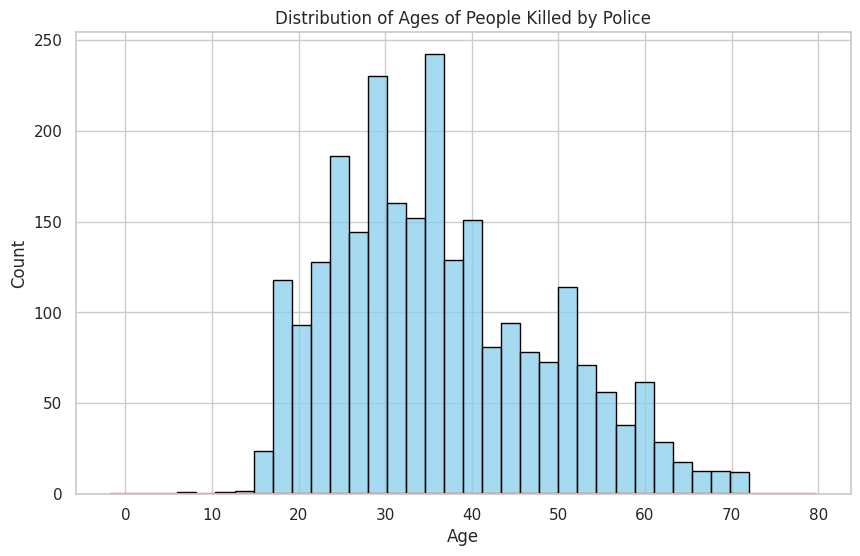

In [34]:
plt.figure(figsize=(10, 6))

sns.histplot(df_imputed['age'], bins=30, kde=False, color='skyblue', edgecolor='black')
sns.kdeplot(df_imputed['age'], color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages of People Killed by Police')
plt.show()

### The percentage have been diagnosed with a mental illness

<ipython-input-35-8d2f99032517>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='signs_of_mental_illness', data=df_imputed, palette='Set2')


Percentage of people killed by police with signs of mental illness: 24.87%


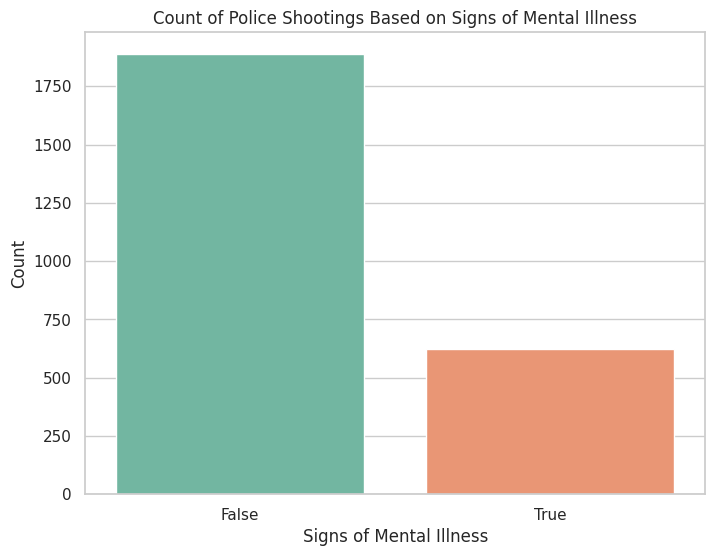

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='signs_of_mental_illness', data=df_imputed, palette='Set2')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Count of Police Shootings Based on Signs of Mental Illness')

# Calculate the percentage
total_shootings = len(df_imputed)
mental_illness_count = df_imputed['signs_of_mental_illness'].sum()
percentage_mental_illness = (mental_illness_count / total_shootings) * 100

print(f"Percentage of people killed by police with signs of mental illness: {percentage_mental_illness:.2f}%")
plt.show()

### In Which Cities Do the Most Police Killings Take Place?
The top 10 cities with the most police killings

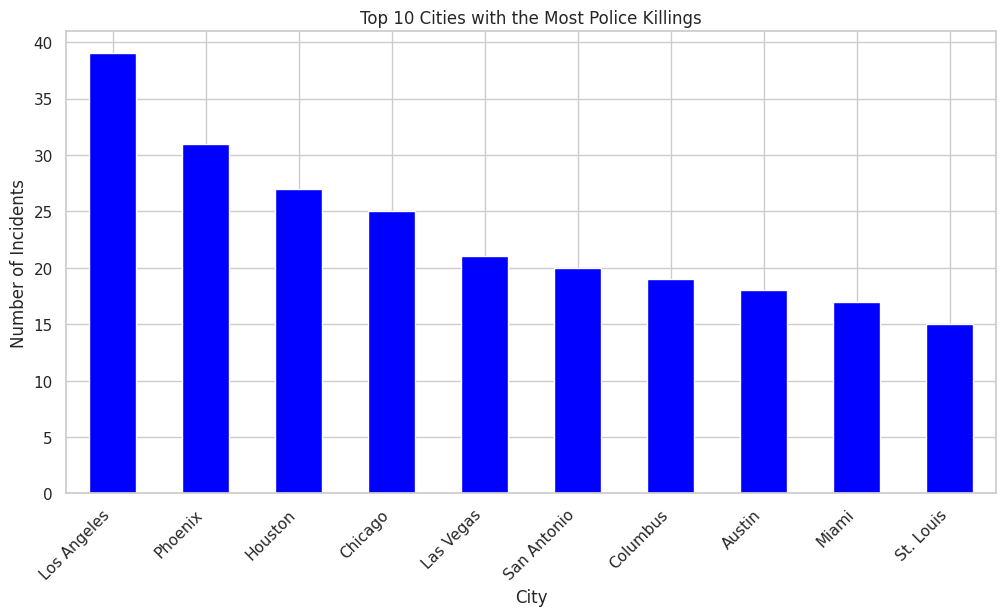

In [36]:
city_counts = df_imputed['city'].value_counts().head(10)  # Displaying the top 10 cities

# Create a bar chart
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='Blue')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Cities with the Most Police Killings')
plt.xticks(rotation=45, ha='right')
plt.show()

# Modelling

## 1. signs_of_mental_illness
We are going to predict signs_of_mental_illness. We will implement predictive system using 4 differnt ML models and compare the result to find the one with the best performance. The ML models that we are going to use in training:

* Logistic Regression
* SVC (Support Vector Classification)
* Decision Tree
* Random Forest

In [37]:
df_imputed.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-02-01,shot,gun,53.000,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.000,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.000,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.000,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.000,M,H,Evans,CO,False,attack,Not fleeing,False,2015


### Feature Engineering

Encoding is a specific type of transformation applied to categorical variables to represent them in a numerical format that can be used by machine learning algorithms.

Common encoding techniques include:
* Label Encoding: Assigning a unique numerical label to each category.

* One-Hot Encoding: Creating binary columns(0,1) for each category.

* manner_of_death -> Shot = 0, Shot and Tasered =1
* gender --> Male = 1, Female = 0
* race --> 'A'= 0, 'W'= 5, 'H'= 2, 'B'=1, 'O'=4, 'N'=3
* threat_level --> attack= 0, other= 1, undetermined= 2
* flee --> Not fleeing= 2, Car= 0, Foot= 1, Other= 3
* signs_of_mental_illness -> False = 0, True = 1
* body camera -> False =0, True= 1

In [38]:
df_copy = df_imputed.copy()

In [39]:
from sklearn.preprocessing import LabelEncoder

#LabelEncoder instance
le = LabelEncoder()

df_copy['manner_of_death'] = le.fit_transform(df_copy['manner_of_death'])
#df_copy['armed'] = le.fit_transform(df_copy['armed'])
df_copy['armed'] = le.fit_transform(df_copy['armed'].astype(str))
df_copy['gender'] = le.fit_transform(df_copy['gender'])
df_copy['race'] = le.fit_transform(df_copy['race'])
df_copy['threat_level'] = le.fit_transform(df_copy['threat_level'])
df_copy['flee'] = le.fit_transform(df_copy['flee'])
df_copy['signs_of_mental_illness'] = le.fit_transform(df_copy['signs_of_mental_illness'])
df_copy['body_camera'] = le.fit_transform(df_copy['body_camera'])
df_copy['year'] = le.fit_transform(df_copy['year'])

df_copy.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-02-01,0,26,53.000,1,0,Shelton,WA,1,0,2,0,0
1,4,Lewis Lee Lembke,2015-02-01,0,26,47.000,1,5,Aloha,OR,0,0,2,0,0
2,5,John Paul Quintero,2015-03-01,1,65,23.000,1,2,Wichita,KS,0,1,2,0,0
3,8,Matthew Hoffman,2015-04-01,0,64,32.000,1,5,San Francisco,CA,1,0,2,0,0
4,9,Michael Rodriguez,2015-04-01,0,45,39.000,1,2,Evans,CO,0,0,2,0,0


In [40]:
# Remove unwanted columns
df_copy = df_copy.drop(columns=["id","name", "date", "city", "state"])
df_copy.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,year
0,0,26,53.000,1,0,1,0,2,0,0
1,0,26,47.000,1,5,0,0,2,0,0
2,1,65,23.000,1,2,0,1,2,0,0
3,0,64,32.000,1,5,1,0,2,0,0
4,0,45,39.000,1,2,0,0,2,0,0


In [41]:
X = df_copy.drop(columns="signs_of_mental_illness")
y = df_copy["signs_of_mental_illness"]

# Train and test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalization

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:
# Initialize models
logistic_regression = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

In [45]:
# Train models
logistic_regression.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [46]:
# Predictions
lr_predictions = logistic_regression.predict(X_test_scaled)
svc_predictions = svc.predict(X_test_scaled)
dt_predictions = decision_tree.predict(X_test_scaled)
rf_predictions = random_forest.predict(X_test_scaled)

In [47]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, classification_report

eval_table = PrettyTable()
eval_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

models = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest']
for i, preds in enumerate([lr_predictions, svc_predictions, dt_predictions, rf_predictions]):
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)

    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']

    eval_table.add_row([models[i], f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1_score:.4f}"])

# Print the PrettyTable
print(eval_table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |  0.7475  |   0.5000  | 0.0315 |  0.0593  |
|         SVC         |  0.7416  |   0.2000  | 0.0079 |  0.0152  |
|    Decision Tree    |  0.6640  |   0.2812  | 0.2126 |  0.2422  |
|    Random Forest    |  0.7117  |   0.3750  | 0.2126 |  0.2714  |
+---------------------+----------+-----------+--------+----------+


### Fine tuning

Random search on Random forest

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    random_forest, param_distributions=param_dist, n_iter=100,
    cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)


random_search.fit(X_train_scaled, y_train)
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 30}


In [49]:
best_rf_model = random_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test_scaled)

#Evaluation
best_accuracy = accuracy_score(y_test, best_rf_predictions)
best_report = classification_report(y_test, best_rf_predictions, output_dict=True)



# PrettyTable
eval_table = PrettyTable()
eval_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
eval_table.add_row(["Random Forest", f"{best_accuracy:.4f}", f"{best_report['1']['precision']:.4f}",
                    f"{best_report['1']['recall']:.4f}", f"{best_report['1']['f1-score']:.4f}"])
print("\nBest Model Evaluation:")
print(eval_table)


Best Model Evaluation:
+---------------+----------+-----------+--------+----------+
|     Model     | Accuracy | Precision | Recall | F1-Score |
+---------------+----------+-----------+--------+----------+
| Random Forest |  0.7435  |   0.4615  | 0.0945 |  0.1569  |
+---------------+----------+-----------+--------+----------+


## 2. Race
We are going to predict Race. We will implement predictive system using 2 differnt ML models and compare the result to find the one with the best performance. The ML models that we are going to use in training:

* Neural network
* Random forest

In [50]:
df_copy['race'].value_counts()

5    1378
1     616
2     421
0      39
3      31
4      28
Name: race, dtype: int64

As it is obvious Race is imbalance, and we need to resample this column befor modelling

In [51]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df_copy.drop(columns=['race'])  # Features
y = df_copy['race']  # Target


#Instance of SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='race')], axis=1)

# Shuffle the DataFrame to mix the samples
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)


df_resampled['race'].value_counts()


2    1378
3    1378
5    1378
4    1378
0    1378
1    1378
Name: race, dtype: int64

In [52]:
X = df_resampled.drop(columns=['race'])  # Features
y = df_resampled['race']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training

In [54]:
from sklearn.neural_network import MLPClassifier

# Initialize models
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train the models
random_forest.fit(X_train_scaled, y_train)
nn_classifier.fit(X_train_scaled, y_train)


# predictions
nn_predictions = nn_classifier.predict(X_test_scaled)
rf_predictions = random_forest.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, classification_report

eval_table = PrettyTable()
eval_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

models = ['Neural Netwoek', 'Random Forest']
for i, preds in enumerate([nn_predictions, rf_predictions]):
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)

    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']

    eval_table.add_row([models[i], f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1_score:.4f}"])

# Print the PrettyTable
print(eval_table)

+----------------+----------+-----------+--------+----------+
|     Model      | Accuracy | Precision | Recall | F1-Score |
+----------------+----------+-----------+--------+----------+
| Neural Netwoek |  0.5726  |   0.4439  | 0.3182 |  0.3707  |
| Random Forest  |  0.6814  |   0.5475  | 0.5839 |  0.5651  |
+----------------+----------+-----------+--------+----------+
